In [1]:
# instalo la librería que me falta:
%pip install seaborn
%pip install sqlalchemy


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


CONEXION CON MYSQL - CARGA DE TABLAS - CREACIÓN DATAFRAMES:
Definiré 3 funciones: conexión, diccionario tablas, diccionario datraframes. Utilizaré main al final para ejecutar las funciones y mostrar mensajes.

In [2]:
# Importo las librerías que necesitaré para el sprint
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import mysql.connector

# Función para conectarme a la base de datos y verificar la conexión
def conexion():
    conexion = mysql.connector.connect(user='root', password='SQLespe2010', host='localhost', database='sprint4', port='3306')
    
    # Verificación de la conexión
    if conexion.is_connected():
        print(f"Conectado a la BBDD '{conexion.database}'")
    else:
        print("Error al conectar a la base de datos")
    
    return conexion

# Función para obtener las tablas de la base de datos
def obtener_tablas(conexion):
    cursor = conexion.cursor()
    cursor.execute("SHOW TABLES;")
    tablas = cursor.fetchall()
    diccionario_tablas = {tabla[0]: f"SELECT * FROM {tabla[0]}" for tabla in tablas}
    return diccionario_tablas

# Función para crear los dataframes para cada tabla de manera dinámica
def dicc_dataframes(conexion):
    dicc_tablas = obtener_tablas(conexion)
    dataframes = {}
    for tabla, query in dicc_tablas.items():
        df = pd.read_sql(query, conexion)
        dataframes[tabla] = df
        print(f"Dataframe creado para la tabla '{tabla}' con {len(df)} filas")
    # Uso 'global' para dar nombre de variable a cada df (variable=tabla_df)
    for tabla, df in dataframes.items():
        globals()[f"{tabla}_df"] = df  # Asigna el DataFrame a una variable global con el nombre de la tabla
    return dataframes

# con main ejecuto las funciones y cierro la conexión
def main():
    conexion_db = conexion()
    dicc_dataframes(conexion_db)  
    conexion_db.close()
    print("Conexión a la BBDD cerrada")


main()

Conectado a la BBDD 'sprint4'
Dataframe creado para la tabla 'cc_active' con 275 filas
Dataframe creado para la tabla 'companies' con 100 filas
Dataframe creado para la tabla 'credit_cards' con 275 filas
Dataframe creado para la tabla 'product' con 100 filas
Dataframe creado para la tabla 'producttransaction' con 1457 filas
Dataframe creado para la tabla 'transactions' con 587 filas
Dataframe creado para la tabla 'users' con 275 filas
Conexión a la BBDD cerrada


C:\Users\Espe\AppData\Local\Temp\ipykernel_12268\3371102352.py:34: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conexion)


Exploro los datos de la tabla 'cc_active' para revisar si hay que transformar datos. Los datos son correctos.

In [3]:
print(cc_active_df.info())
cc_active_df.dtypes
print(cc_active_df.head(3))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   credit_card_id  275 non-null    object
 1   EstadoTarjeta   275 non-null    object
dtypes: object(2)
memory usage: 4.4+ KB
None
  credit_card_id EstadoTarjeta
0       CcU-2938        Activa
1       CcU-2945        Activa
2       CcU-2952        Activa


Exploro los datos de la tabla Companies para revisar si hay que transformar datos. Los datos son correctos.

In [4]:
print(companies_df.info())
companies_df.dtypes
print(companies_df.head(3))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_id    100 non-null    object
 1   company_name  100 non-null    object
 2   phone         100 non-null    object
 3   email         100 non-null    object
 4   country       100 non-null    object
 5   website       100 non-null    object
dtypes: object(6)
memory usage: 4.8+ KB
None
  company_id               company_name           phone  \
0     b-2222  Ac Fermentum Incorporated  06 85 56 52 33   
1     b-2226   Magna A Neque Industries  04 14 44 64 62   
2     b-2230                Fusce Corp.  08 14 97 58 85   

                              email        country  \
0  donec.porttitor.tellus@yahoo.net        Germany   
1       risus.donec.nibh@icloud.org      Australia   
2              risus@protonmail.edu  United States   

                            website  
0      https://instagram

Exploro los datos de la tabla 'credit_cards' para revisar si hay que transformar datos. Los datos son correctos.

In [5]:
print(credit_cards_df.info())
credit_cards_df.dtypes
print(credit_cards_df.head(3))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             275 non-null    object
 1   user_id        275 non-null    int64 
 2   iban           275 non-null    object
 3   pan            275 non-null    object
 4   pin            275 non-null    int64 
 5   cvv            275 non-null    int64 
 6   track1         275 non-null    object
 7   track2         275 non-null    object
 8   expiring_date  275 non-null    object
dtypes: int64(3), object(6)
memory usage: 19.5+ KB
None
         id  user_id                          iban               pan   pin  \
0  CcU-2938      275    TR301950312213576817638661  5424465566813633  3257   
1  CcU-2945      274  DO26854763748537475216568689  5142423821948828  9080   
2  CcU-2952      273        BG45IVQL52710525608255  4556 453 55 5287  4598   

   cvv                                         track1 

Exploro los datos de la tabla 'product' para revisar si hay que transformar datos. Los datos son correctos.

In [6]:
print(product_df.info())
product_df.dtypes
print(product_df.head(3))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            100 non-null    int64  
 1   product_name  100 non-null    object 
 2   price         100 non-null    float64
 3   colour        100 non-null    object 
 4   weight        100 non-null    int64  
 5   warehouse_id  100 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 4.8+ KB
None
   id            product_name   price   colour  weight warehouse_id
0   1        Direwolf Stannis  161.11  #7c7c7c       1         WH-4
1   2             Tarly Stark    9.24  #919191       2         WH-3
2   3  duel tourney Lannister  171.13  #d8d8d8       2         WH-2


Exploro los datos de la tabla 'producttransaction' para revisar si hay que transformar datos. Los datos son correctos.

In [7]:
print(producttransaction_df.info())
producttransaction_df.dtypes
print(producttransaction_df.head(3))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1457 entries, 0 to 1456
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   transaction_id  1457 non-null   object
 1   product_id      1457 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 22.9+ KB
None
                         transaction_id  product_id
0  02C6201E-D90A-1859-B4EE-88D2986D3B02           1
1  122DC333-E19F-D629-DCD8-9C54CF1EBB9A           1
2  1753A288-9FC1-52E6-5C39-A1FFB97B0D3A           1


Exploro los datos de la tabla 'transactions' para revisar si hay que transformar datos. Hago una exploración más profunda con describe y shape ya que es la tabla de hechos y me interesa para revisar las variables para g¡cada ejercicio. Los datos no son correctos. Tengo que transformar lat y long a float en caso de querer utilizarlos más adelante.

In [8]:
print(transactions_df.info())
print(transactions_df.head(3))
print(transactions_df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 587 entries, 0 to 586
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           587 non-null    object        
 1   card_id      587 non-null    object        
 2   business_id  587 non-null    object        
 3   timestamp    587 non-null    datetime64[ns]
 4   amount       587 non-null    float64       
 5   declined     587 non-null    int64         
 6   product_ids  587 non-null    object        
 7   user_id      587 non-null    int64         
 8   lat          587 non-null    object        
 9   longitude    587 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 46.0+ KB
None
                                     id   card_id business_id  \
0  02C6201E-D90A-1859-B4EE-88D2986D3B02  CcU-2938      b-2362   
1  0466A42E-47CF-8D24-FD01-C0B689713128  CcU-4219      b-2302   
2  063FBA79-99EC-66FB-29F

In [9]:
print(transactions_df.describe())

                           timestamp      amount    declined     user_id
count                            587  587.000000  587.000000  587.000000
mean   2021-09-06 14:56:16.795570688  256.735520    0.148211  201.359455
min              2021-03-17 02:55:49   15.050000    0.000000   60.000000
25%       2021-06-02 05:14:58.500000  131.115000    0.000000  126.000000
50%              2021-08-27 10:25:34  257.440000    0.000000  220.000000
75%              2021-12-13 08:24:48  389.900000    0.000000  268.000000
max              2022-03-16 14:01:36  499.230000    1.000000  275.000000
std                              NaN  144.133895    0.355612   71.104417


Preparo columnas de Mes-Año, Año y mes para trabajar con las fechas en los graficos

In [10]:
transactions_df['timestamp'] = pd.to_datetime(transactions_df['timestamp'])

transactions_df['mes-año'] = transactions_df['timestamp'].dt.strftime('%Y-%m')

transactions_df['año'] = transactions_df['timestamp'].dt.year

transactions_df['mes'] = transactions_df['timestamp'].dt.to_period('M')

print(transactions_df[['timestamp', 'mes-año', 'año', 'mes']].head())

            timestamp  mes-año   año      mes
0 2021-08-28 23:42:24  2021-08  2021  2021-08
1 2021-07-26 07:29:18  2021-07  2021  2021-07
2 2022-01-06 21:25:27  2022-01  2022  2022-01
3 2022-01-26 02:07:14  2022-01  2022  2022-01
4 2021-10-26 23:00:01  2021-10  2021  2021-10


Transformo el valor de 0, 1 del campo 'declined' a 'aceptada' y 'denegada' para que sea inequívoco. Para ello primero lo convierto en string y luego reemp`lazo por los textos

In [11]:
transactions_df['declined'] = transactions_df['declined'].astype(str)
transactions_df['declined'] = transactions_df['declined'].str.replace('0', 'Aceptada')
transactions_df['declined'] = transactions_df['declined'].str.replace('1', 'Denegada')

In [12]:
print(transactions_df.info())
print(transactions_df.head(3))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 587 entries, 0 to 586
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           587 non-null    object        
 1   card_id      587 non-null    object        
 2   business_id  587 non-null    object        
 3   timestamp    587 non-null    datetime64[ns]
 4   amount       587 non-null    float64       
 5   declined     587 non-null    object        
 6   product_ids  587 non-null    object        
 7   user_id      587 non-null    int64         
 8   lat          587 non-null    object        
 9   longitude    587 non-null    object        
 10  mes-año      587 non-null    object        
 11  año          587 non-null    int32         
 12  mes          587 non-null    period[M]     
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(8), period[M](1)
memory usage: 57.5+ KB
None
                                     id   card_id

Exploro los datos de la tabla 'users' para revisar si hay que transformar datos. El campo 'birth_date' está como object y lo cambiaré a datetime para poder calcular edades y categorizarlas en grupos de edad más adelante.

In [13]:
print(users_df.info())
users_df.shape
print(users_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           275 non-null    int64 
 1   name         275 non-null    object
 2   surname      275 non-null    object
 3   phone        275 non-null    object
 4   email        275 non-null    object
 5   birth_date   275 non-null    object
 6   country      275 non-null    object
 7   city         275 non-null    object
 8   postal_code  275 non-null    object
 9   address      275 non-null    object
dtypes: int64(1), object(9)
memory usage: 21.6+ KB
None
   id     name    surname           phone                              email  \
0   1     Zeus     Gamble  1-282-581-0551       interdum.enim@protonmail.edu   
1   2  Garrett  Mcconnell  (718) 257-2412  integer.vitae.nibh@protonmail.org   
2   3   Ciaran   Harrison  (522) 598-1365           interdum.feugiat@aol.org   
3   4   Howard   Stafford  

In [14]:
users_df['birth_date'] = pd.to_datetime(users_df['birth_date'], format='%b %d, %Y')
print(users_df.info())
print(users_df.head(3))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           275 non-null    int64         
 1   name         275 non-null    object        
 2   surname      275 non-null    object        
 3   phone        275 non-null    object        
 4   email        275 non-null    object        
 5   birth_date   275 non-null    datetime64[ns]
 6   country      275 non-null    object        
 7   city         275 non-null    object        
 8   postal_code  275 non-null    object        
 9   address      275 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 21.6+ KB
None
   id     name    surname           phone                              email  \
0   1     Zeus     Gamble  1-282-581-0551       interdum.enim@protonmail.edu   
1   2  Garrett  Mcconnell  (718) 257-2412  integer.vitae.nibh@protonmail

# EJERCICIO 1: UNA VARIABLE NUMÉRICA

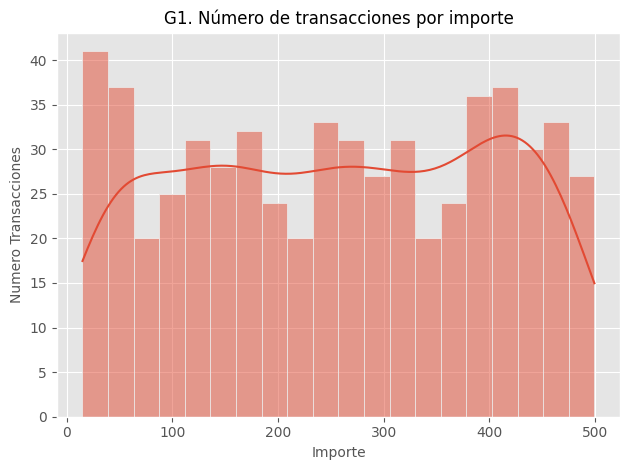

In [15]:
plt.style.use('ggplot')

sns.histplot(transactions_df['amount'], bins=20, kde=True)

plt.title('G1. Número de transacciones por importe', fontsize=12)
plt.xlabel('Importe', fontsize=10)
plt.ylabel('Numero Transacciones', fontsize=10)

plt.tight_layout()
plt.show()

Elección del gráfico:
Elegí un histograma porque quiero ver cómo se distribuyen los importes de las transacciones. El histograma nos da una idea de cuántas transacciones entran en determinados rangos de importe. Podría haber usado un boxplot (lo usaré más adelante)para ver los outliers de forma más clara, pero el histograma nos muestra una idea general de la distribución.

Datos destacables:
Vemos que la media (256,73€) y la mediana (257,44€) están bastante cerca. Sin embargo, la desviación estándar de 144,13€ indica que la dispersión de importes es elevada. 

Interpretación:
La media de las compras están en torno a los 257€, pero hay muchas que se desvían hacia importes muy bajos o muy altos. ¿Qúe nos dice? que los usuarios no gastan lo mismo y que las empresas deberían aprovechar esas diferencias para definir las diferentes estrategias de marketing personalizadas.

EJERCICIO 2: 2 VARIABLES NUMÉRICAS

Analizaré la distribución de los precios de los artículos y su peso.
Primero analizo la correlación entre las variables con el análisis de Tau-Kendall

In [28]:
tau, p_value = kendalltau(product_df['price'], product_df['weight'])

print(f"Tau de Kendall: {tau}")
print(f"P-valor: {p_value}")

Tau de Kendall: 0.07383229862727651
P-valor: 0.3438372196671401


Tau: está muy cerca de 0 y aunque es positiva (relación directa), la correlación es muy débil.
P-Valor: Mucho mayor a 0,05. No indica correlación estadística

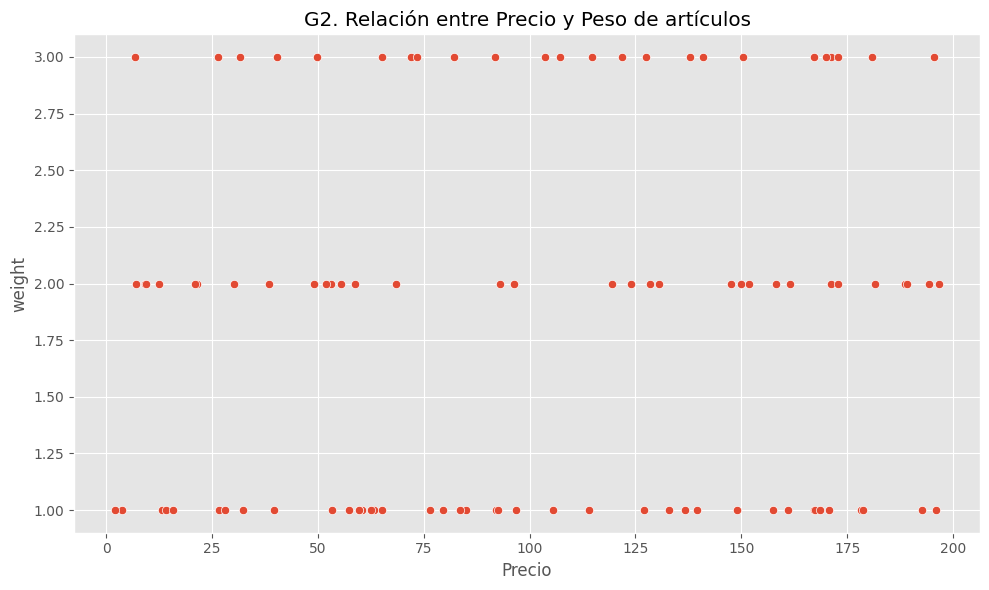

In [29]:
plt.style.use('ggplot')


plt.figure(figsize=(10, 6))
sns.scatterplot(x=product_df['price'], y=product_df['weight'])


plt.title('G2. Relación entre Precio y Peso de artículos')
plt.xlabel('Precio')
plt.ylabel('weight')

# plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

Vemos que los artículos tienen en general sólo 3 pesos: 1, 2 o 3 kilos. Parece que los artículos con peso de 1 kilo son los más abundantes y que van disminuyendo a medida que aumenta el peso. En cuanto al precio, se ve que no no hay patrón aparente tal y como indica el analisis de la correlación entre estas variables realizado más arriba.

EJERCICIO 3: UNA VARIABLE CATEGÓRICA

Empresas por país

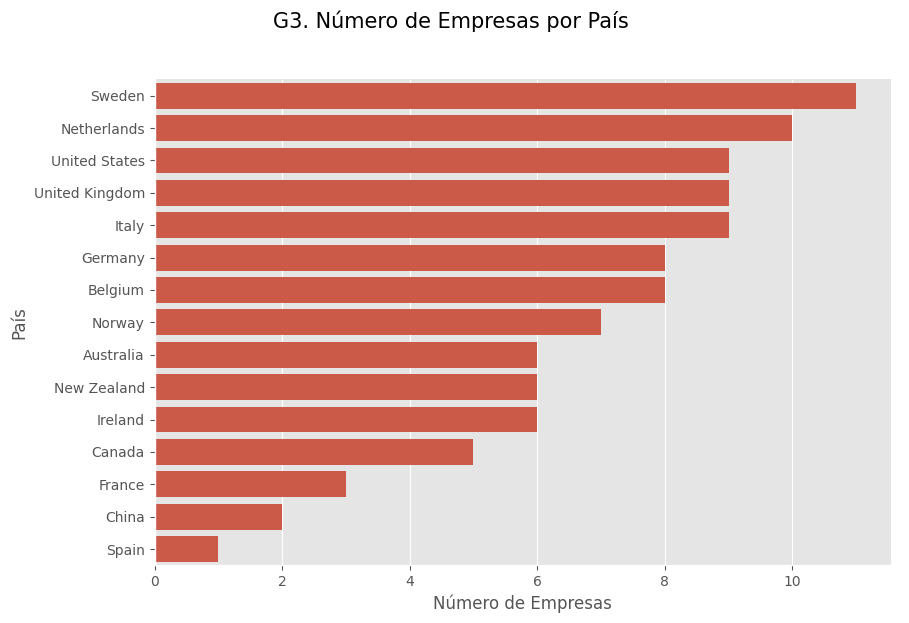

In [17]:

plt.style.use('ggplot')

g3 = sns.catplot(y = 'country', data = companies_df, kind='count', height= 6, aspect=1.5,order=companies_df['country'].value_counts().index)

g3.fig.suptitle('G3. Número de Empresas por País', fontsize=15, y=1.03)
g3.set(xlabel='Número de Empresas', ylabel='País')

plt.tight_layout()
plt.show()

Elección del gráfico:
Para analizar el número de empresas por país, he usado un gráfico de barras. Es adecuado para variables categóricas, como los países y la visualización es muy clara e intiuitiva. Aunque también podrían haberse usado gráficos como el pie o el waffle, las barras son más directas para comparar las cantidades.

Datos destacables:
El gráfico muestra que Suecia (11 empresas) y Países Bajos (10 empresas) tienen más empresas, mientras que países como España (1) y China (2) tienen menos. Esto muestra una distribución desigual de empresas entre los países.

Interpretación:
La concentración de empresas en pocos países podría indicar que esos mercados están más desarrollados. Aunque en una lectura positiva, los países con menos empresas pueden representar oportunidades para nuevas inversiones o expansión de negocio.

EJERCICIO  4: UNA VARIABLE CATEGORICA Y UNA NUMÉRICA

voy a analizar el importe por fecha, pero dado que en el ejercicio 2 veíamos mucha dispersión y ningín patrón aparente, aprovecho este ejercicio para profundizar categorizando las fechas por mes/año en nueva columna.

Como no consigo que me pordene los meses de 2021 y 2022 conológig¡camente creo una variable para pedir que ordene y la uso en el parámetro order en la creación del gráfico.

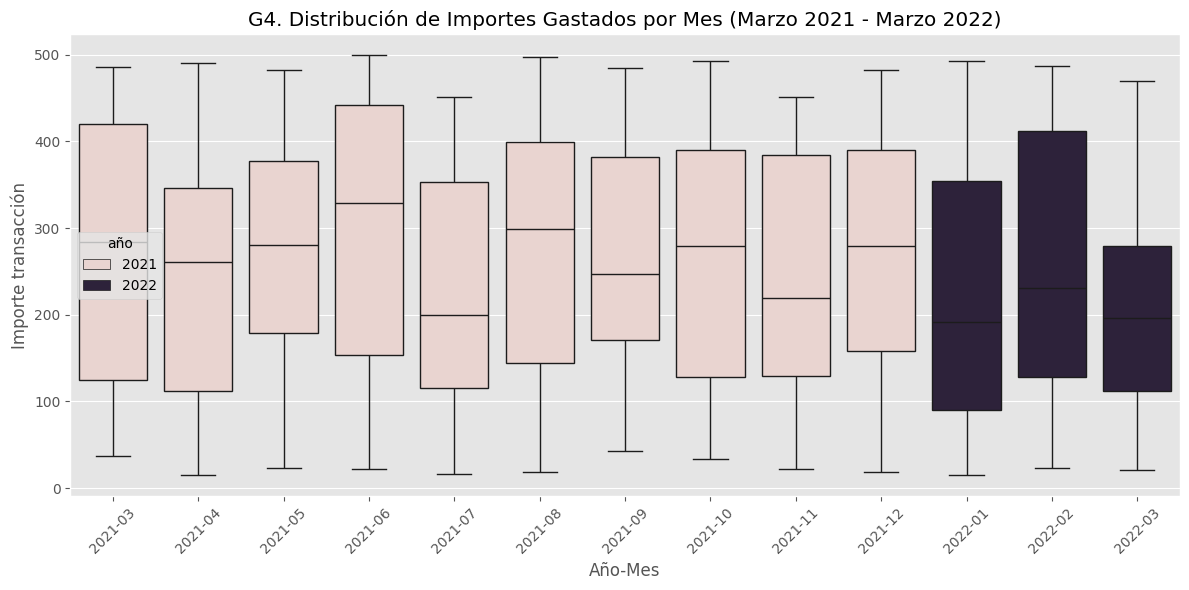

In [19]:
transactions_df['año-mes'] = transactions_df['timestamp'].dt.to_period('M').astype(str)
transactions_df['año'] = transactions_df['timestamp'].dt.year

reordenar = sorted(transactions_df['año-mes'].unique())

plt.style.use('ggplot')
plt.figure(figsize=(12, 6))

sns.boxplot(x='año-mes', y='amount', hue='año', data=transactions_df, order=reordenar)

plt.title('G4. Distribución de Importes Gastados por Mes (Marzo 2021 - Marzo 2022)')
plt.xlabel('Año-Mes')
plt.ylabel('Importe transacción')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Elección del gráfico:
He usado un boxplot para ver cómo se distribuyen los importes de las transacciones a lo largo de los meses, diferenciando entre los años. Es ideal para ver la dispersión de los datos y los valores atípicos en cada mes. Las cajas más pequeñas indican que los importes están más concentrados. Las que las cajas más grandes, mamás variabilidad de importes. Los "bigotes" del gráfico, cuanto más largos, mayor dispersión de los importes fuera de la caja, es decir, que habrá importes atípicos. Un gráfico de líneas también podría haber sido útil, pero lo escogeré en otro ejercicio. El boxplot es perfecto para reflejar los rangos y los valores fuera de ellos.

Datos destacables:
En los primeros meses de 2021, los importes están bastante concentrados. En enero la mediana es de unos 180€, mientras que en marzo, sube un poco a 200€. Sin embargo, se nota que hacia finales de 2021, hacia diciembre, la variabilidad de los importes aumenta, con picos de ventas altas. En diciembre 2021 hay transacciones que mayores a 600€, mientras que en algunos meses como abril, los importes bajan hasta los 50€.

Interpretación:
Las transacciones se concentran en rangos de ventas entre 150€ y 250€, pero en algunos meses, como diciembre, los inportes dse desmarcan (más de 600€) y hay un evidente aumento en las compras (¿campañas de navidad?). Los meses con más dispersión, como diciembre y enero, reflejan que hay una mezcla de transacciones grandes y pequeñas. El comportamiento de los clientes puede varía dependiendo del mes. Interesante para fijar las políticas de ventas o campañas puntuales estacionales.

EJERCICIO 5: DOS VARIABLES CATEGÓRICAS
Voy a centrarme en analizar los usuarios (según su edad) por país y franja de edad, que todavía no habían entrado en ningun gráfico. 
Tenemos la fecha de nacimiento. Calcularé la edad restando fecha actual y fecha nacimiento. Crearé las 2 columnas para mostrar la edad calculada y el grupo al que pertenece

In [438]:
hoy = pd.Timestamp.today()
users_df['edad'] = hoy.year - users_df['birth_date'].dt.year 
print(users_df.head())


   id     name    surname           phone                              email  \
0   1     Zeus     Gamble  1-282-581-0551       interdum.enim@protonmail.edu   
1   2  Garrett  Mcconnell  (718) 257-2412  integer.vitae.nibh@protonmail.org   
2   3   Ciaran   Harrison  (522) 598-1365           interdum.feugiat@aol.org   
3   4   Howard   Stafford  1-411-740-3269          ornare.egestas@icloud.edu   
4   5    Hayfa     Pierce  1-554-541-2077     et.malesuada.fames@hotmail.org   

  birth_date        country        city postal_code                 address  \
0 1985-11-17  United States      Lowell       73544   348-7818 Sagittis St.   
1 1992-08-23  United States  Des Moines       59464             903 Sit Ave   
2 1998-04-29  United States    Columbus       56518     736-2063 Tellus St.   
3 1989-02-18  United States      Kailua       77417  Ap #545-2244 Erat. Rd.   
4 1998-09-26  United States       Sandy       31564   341-2821 Ultrices Av.   

   edad grupo_edad  
0    40      Medio  
1 

Creo otra columna de 'grupo_edad' donde para clasificar a cada usuario

In [439]:
bins_edad = [0, 25, 35, 45, 75]
etiqueta_edad = ['Junior', 'Joven', 'Medio', 'Senior'] 
orden_categorias = ['Junior', 'Joven', 'Medio', 'Senior']

users_df['grupo_edad'] = pd.cut(users_df['edad'], bins=bins_edad, labels=etiqueta_edad, right=False)

print(users_df[['id', 'name', 'edad', 'grupo_edad']].head(10))

   id     name  edad grupo_edad
0   1     Zeus    40      Medio
1   2  Garrett    33      Joven
2   3   Ciaran    27      Joven
3   4   Howard    36      Medio
4   5    Hayfa    27      Joven
5   6     Joel    36      Medio
6   7   Rafael    44      Medio
7   8   Nissim    32      Joven
8   9   Mannix    38      Medio
9  10   Robert    41      Medio


In [ ]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           275 non-null    int64         
 1   name         275 non-null    object        
 2   surname      275 non-null    object        
 3   phone        275 non-null    object        
 4   email        275 non-null    object        
 5   birth_date   275 non-null    datetime64[ns]
 6   country      275 non-null    object        
 7   city         275 non-null    object        
 8   postal_code  275 non-null    object        
 9   address      275 non-null    object        
 10  edad         275 non-null    int32         
 11  grupo_edad   275 non-null    category      
dtypes: category(1), datetime64[ns](1), int32(1), int64(1), object(8)
memory usage: 23.2+ KB


Para el gráfico, muestro el procentaje de población por rengo de edad y país. En el eje de las x las categorías de edad y en eje y, el porcentaje. Utilizaremos el país para hue

C:\Users\Espe\AppData\Local\Temp\ipykernel_4140\3699448170.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grupo_pais_edad = users_df.groupby(['country', 'grupo_edad']).size().reset_index(name='count')


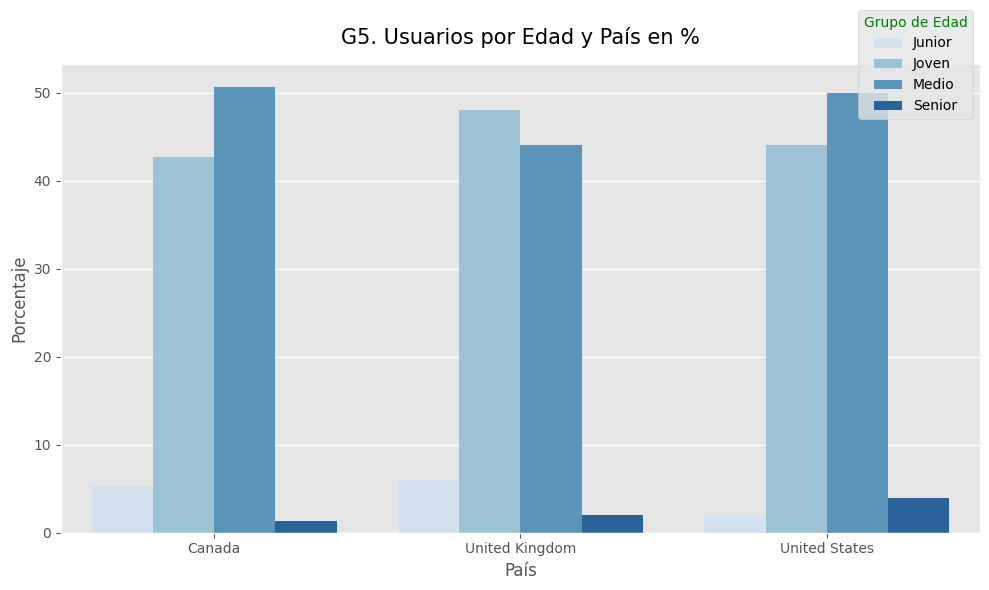

In [ ]:
plt.style.use('ggplot')

grupo_pais_edad = users_df.groupby(['country', 'grupo_edad']).size().reset_index(name='count')
total_pais = grupo_pais_edad.groupby('country')['count'].transform('sum')
grupo_pais_edad['percentage'] = (grupo_pais_edad['count'] / total_pais) * 100

fig, ax = plt.subplots(figsize=(10, 6))

ax = sns.barplot(data=grupo_pais_edad,x='country', y='percentage', hue='grupo_edad',palette="Blues", 
    order=grupo_pais_edad['country'].unique())

plt.title('G5. Usuarios por Edad y País en %', fontsize=15, pad=15)
plt.xlabel('País', fontsize=12)
plt.ylabel('Porcentaje', fontsize=12)

handles, labels = ax.get_legend_handles_labels()
legend = ax.legend(handles, labels, title="Grupo de Edad", fontsize=10, bbox_to_anchor=(1.00, 1), loc='center right')
legend.get_title().set_color('green')

plt.tight_layout()
plt.show()

Elección del gráfico:
He elegido un gráfico de barras agrupadas para representar la distribución en porcentaje de los usuarios según su franja de edad y desglosando por país. Este gráfico compara visualmente las categorías de edad en cada país de manera clara.
Utilizo hue para separar las franjas de edad por colores en a cada país. Podría haber utilizado barras apiladas, pero la visualización no es tan clara. He utilizado la distribución de esas franjas de edades procentualmente en lugar de con cifras absolutas para que sea más intuitivo al no conocer la población total del país. Nos muestra la representación en relación con el total.

Datos destacables:
Las franjas de edad definidas son: Junior(<25), Joven(25-35), Medio(35-45) y Senior(>45). En todos los países la mayor parte de la población está distribuida en las franjas 'Joven' y 'Medio'.
En los países más grandes y en del continente norteamericano (Estados Unidos y Canadá) presentan la mayor población en la franja de 'Medio' mientras que en UK la población mayoritaria es la 'Joven'.
En cuanto a la distribución de las franjas de edad minoritarias, es decir, Junior y Senior, Canadá y UK tienen una distribución similar (más juniors que seniors), y en estados unidos se invierte (más seniors que juniors).

Interpretación:
En Reino unidos las franjas de Joven y Senior están más equilibradas y viendo que gana la población Joven, unido al hecho que las ventas de la población Junior superan a las Senior, hace pensar en apostar por políticas y estrategias de marketing que favorezcan a la poblacion más joven para beneficiarse de esta distribución. Mientras que en Estados Unidos y Canadá, donde las ventas se concentran en población de edad más madura (Medio) y hay más ventas en la población Senior que en la Junior, una política más conservadora, sería má apropiada.

EJERCICIO 6: 3 VARIABLES

Combino gráficao de lineas  (lineplot) con áreas sombreadas para rechazadas y aceptadas (scat)


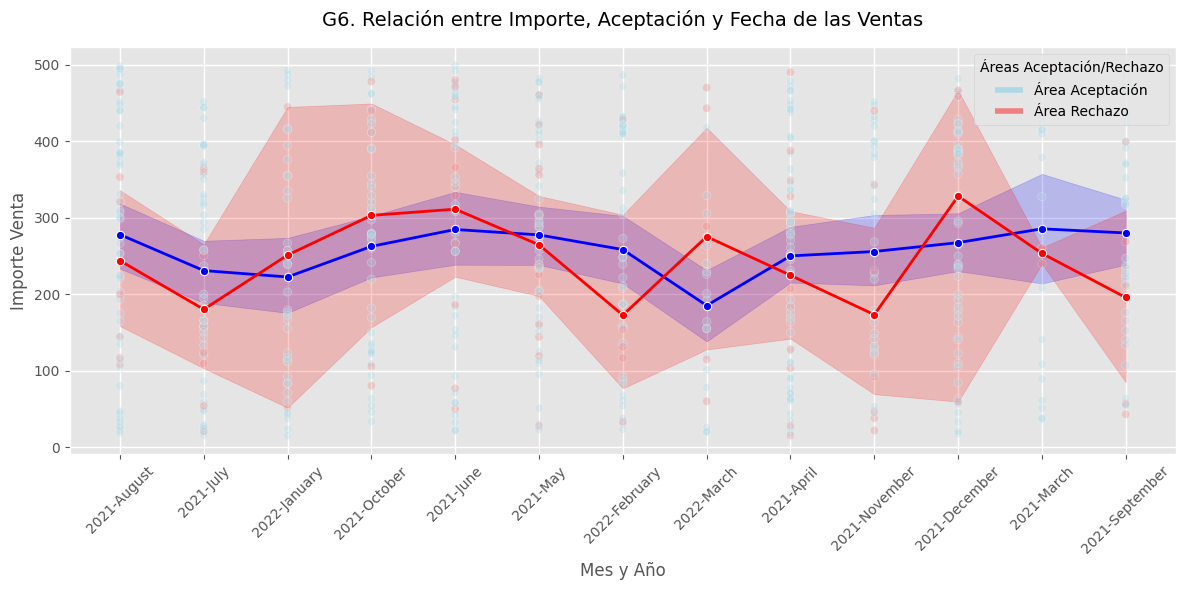

In [436]:
plt.style.use('ggplot')
plt.figure(figsize=(12, 6))

line_plot = sns.lineplot(
    data=transactions_df,
    x='año-mes',
    y='amount',
    hue='declined',
    palette={0: 'blue', 1: 'red'},
    marker='o',
    linewidth=2
)

sns.scatterplot(
    data=transactions_df,
    x='año-mes',
    y='amount',
    hue='declined',
    palette={0: 'lightblue', 1: 'lightcoral'},
    legend=False, 
    alpha=0.3
)

line_plot.set_title('G6. Relación entre Importe, Aceptación y Fecha de las Ventas', fontsize=14, pad=15)
line_plot.set_xlabel('Mes y Año', fontsize=12)
line_plot.set_ylabel('Importe Venta', fontsize=12)
line_plot.legend(title='Rechazada', labels=['Aceptada', 'Rechazada'], bbox_to_anchor=(1.05, 1), loc='upper left')

plt.legend(handles=[lightblue_patch, lightcoral_patch], title='Áreas Aceptación/Rechazo', loc='upper right')
legend.get_title().set_color('green')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Elección del gráfico: 
He usado un gráfico de líneas combinado con scatter para los detalles de cada operación, para ver cómo varían los importes de las transacciones a lo largo del tiempo, diferenciando entre transacciones aceptadas y rechazadas. Es más claro para dibujar las tendencias a lo largo de los meses. He añadido franjas de color para hacer resaltar la diferencia entre los importes de las transacciones aceptadas y rechazadas y ver si existe relación. Aunque también se podrían haber usado el gráfico de área apilada, el gráfico de líneas me parece más claro para estas dos categorías. También vemos en cada vertical del mes los puntos con las ventas individuales con el color de rechazada/aprobada.

Datos destacables: 
Se ve claramente que las aceptadas (línea azul) tienen importes más altos (promedio) que las rechazadas (línea roja). Con las franjas sombreadas del fondo, se ve la variabilidad de los importes: franja azul para aceptadas y franja carne para rechazadas. Estas franjas son las que nos enseñan que las transacciones aceptadas suelen estar en una franja de importes más consistente, cosa que las rechazadas no tienen (precios muy dispersos).

Interpretación: 
Podríamos concluir que las aceptadas suelen tener importes más altos y son más estables en la línea del tiempo, mientras que las rechazadas tienen más variación de importes. Por lo tanto, las transacciones más grandes tienen más probabilidad de ser aceptadas, y que las rechazadas pueden estar más relacionadas con transacciones de menor valor. Sería interesante revisar mecanismos de aceptación y ver si tienen relación con las empresas o con los países y evitar perder ventas por este motivo.

EJERCICIO 7: PAIRPLOT

Haré un merge de los dataframes 'transactions' y 'product' usando la tabla intermedia 'producttransaction'

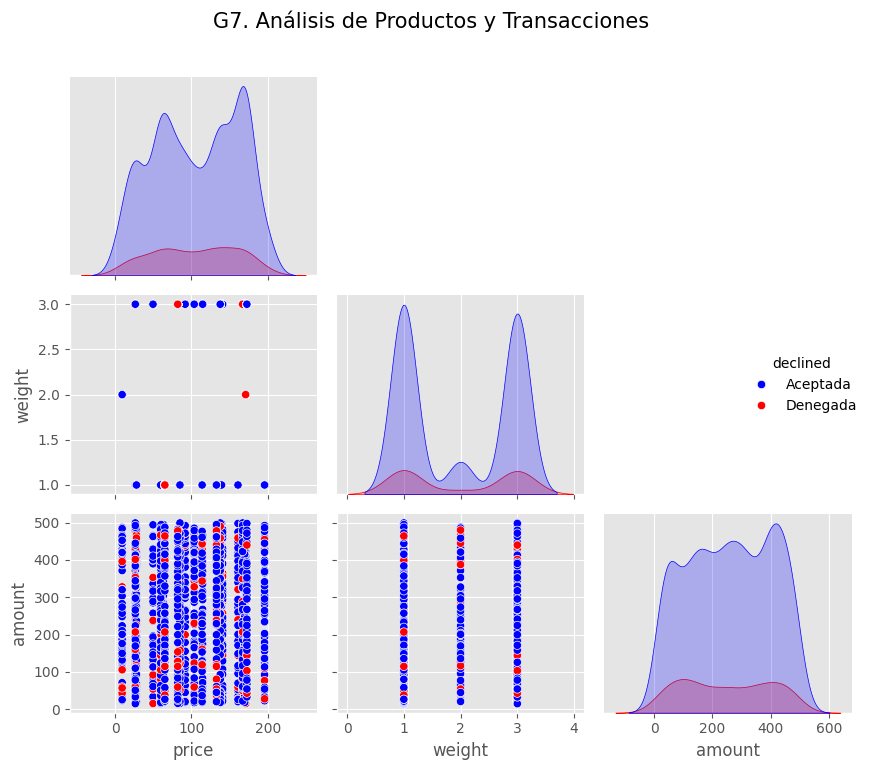

In [22]:
productos_transacciones = producttransaction_df.merge(product_df, left_on="product_id", right_on="id"
                                                      ).merge(transactions_df, left_on="transaction_id", right_on="id")

g7_columnas = ["price", "weight", "amount", "declined"]
g7_datos = productos_transacciones[g7_columnas]

sns.pairplot(g7_datos, diag_kind="kde", corner=True, hue="declined", palette={'Aceptada': "blue", 'Denegada': "red"})
plt.suptitle("G7. Análisis de Productos y Transacciones", fontsize=15, y=1.02)


plt.tight_layout()
plt.show()

Elección del gráfico:
He usado los campos de precio, peso, importe y si la transacción fue rechazada o no (declined). Además, el gráfico tiene el "hue" por 'declined' para reflejar la distribución de ventas aceptadas y rechazadas según las otras variables.

Datos destacables:
Relaciones observadas: el precio y el peso parecen estar correlacionados, ya que los productos más caros suelen ser más pesados. Además, las transacciones rechazadas (rojas) tienden a tener un precio y un peso más bajos en comparación con las aceptadas (azules), lo que confirma lo visto en el gráfico del ejercicio 6.En las diagonales, vemos que los productos rechazados tienen un rango de valoresmás grande, sobre todo en el precio.

Interpretación:
Siguiendo con el análisis de los productos (no de las operaciones), la mayoría de productos rechazados son baratos y ligeros.
Concluiría que los productos más caros o pesados tienen menos probabilidad de ser rechazados, mientras que los productos más baratos o livianos son más candidatos a ser rechazados. Las empresas podrían centrarse en entender por qué los productos de bajo precio y bajo peso se comportan así para reforzar su aceptación  y garantizar la venta.